# Import Dependencies and Setup

In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from scipy.ndimage import sobel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
df = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

# Exploring the Data

In [9]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.shape

(372450, 785)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [12]:
print(df.dtypes)

0        float32
0.1      float32
0.2      float32
0.3      float32
0.4      float32
          ...   
0.644    float32
0.645    float32
0.646    float32
0.647    float32
0.648    float32
Length: 785, dtype: object


In [13]:
print(df.describe())

                   0       0.1       0.2       0.3       0.4       0.5  \
count  372450.000000  372450.0  372450.0  372450.0  372450.0  372450.0   
mean       13.523490       0.0       0.0       0.0       0.0       0.0   
std         6.736685       0.0       0.0       0.0       0.0       0.0   
min         0.000000       0.0       0.0       0.0       0.0       0.0   
25%        10.000000       0.0       0.0       0.0       0.0       0.0   
50%        14.000000       0.0       0.0       0.0       0.0       0.0   
75%        18.000000       0.0       0.0       0.0       0.0       0.0   
max        25.000000       0.0       0.0       0.0       0.0       0.0   

            0.6       0.7       0.8       0.9  ...          0.639  \
count  372450.0  372450.0  372450.0  372450.0  ...  372450.000000   
mean        0.0       0.0       0.0       0.0  ...       0.001616   
std         0.0       0.0       0.0       0.0  ...       0.490786   
min         0.0       0.0       0.0       0.0  ...       

In [14]:
print(df.nunique())

0        26
0.1       1
0.2       1
0.3       1
0.4       1
         ..
0.644     5
0.645     5
0.646     5
0.647     3
0.648     2
Length: 785, dtype: int64


In [15]:
print(df.columns)

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)


# Data Cleaning

In [16]:
print(df.duplicated().sum())
print(df.isnull().sum())

171355
0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64


In [17]:
df = df.drop_duplicates()
df = df.dropna()

In [18]:
df.shape

(201095, 785)

# Exploratory Data Analysis

### 1. Count of Each Alphabet

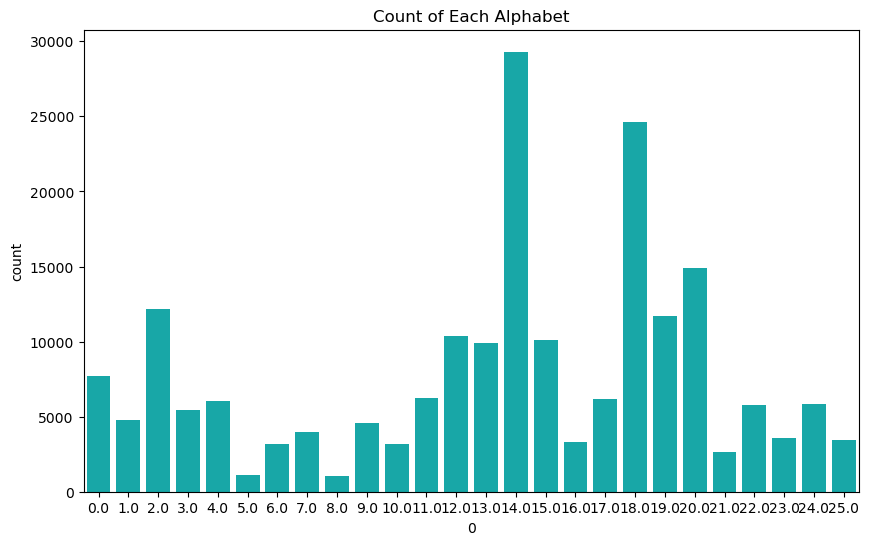

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['0'], color='c')
plt.title("Count of Each Alphabet")
plt.show()

# Display the samples as images 

In [20]:
samples = df.sample(10)

In [21]:
samples_array = samples.to_numpy()

In [22]:
samples_2d = samples_array[:, 1:].reshape(10, 28, 28)

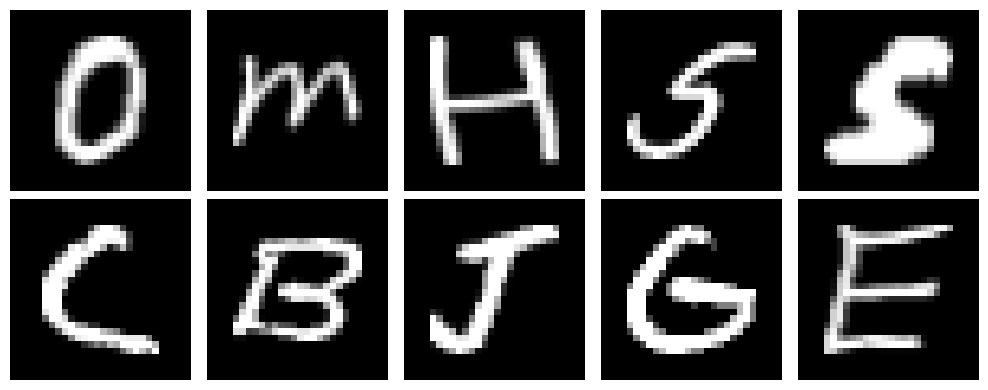

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(samples_2d[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [24]:
X = df.iloc[:, 1:].values / 255.0
y = df.iloc[:, 0].values

# Reshaping for CNN Input and Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Conv2D, ReLU Model Build

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dense(units=26))
model.add(Activation('softmax'))

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
5028/5028 [==============================] - 342s 68ms/step - loss: 0.1551 - accuracy: 0.9555 - val_loss: 0.0848 - val_accuracy: 0.9778
Epoch 2/10
5028/5028 [==============================] - 309s 62ms/step - loss: 0.0621 - accuracy: 0.9824 - val_loss: 0.0655 - val_accuracy: 0.9815
Epoch 3/10
5028/5028 [==============================] - 300s 60ms/step - loss: 0.0459 - accuracy: 0.9871 - val_loss: 0.0530 - val_accuracy: 0.9856
Epoch 4/10
5028/5028 [==============================] - 364s 72ms/step - loss: 0.0377 - accuracy: 0.9889 - val_loss: 0.0622 - val_accuracy: 0.9838
Epoch 5/10
5028/5028 [==============================] - 383s 76ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0589 - val_accuracy: 0.9846
Epoch 6/10
5028/5028 [==============================] - 387s 77ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0582 - val_accuracy: 0.9867
Epoch 7/10
5028/5028 [==============================] - 414s 82ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0

In [30]:
y_pred = model.predict(X_test)

1257/1257 [==============================] - 26s 20ms/step


# Performance of Train and Test set

In [31]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.reshape(y_test, (-1, 1))

In [32]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [34]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

In [46]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 98.62%
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


# Plotting all filters

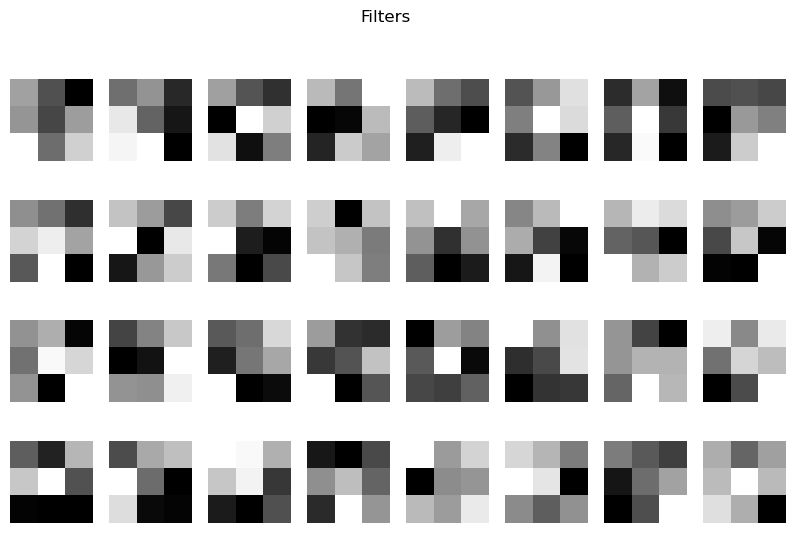

In [36]:
filters, biases = model.layers[0].get_weights()
plt.figure(figsize=(10, 6))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Filters")
plt.show()

# Get the filters

In [37]:
filters, biases = model.layers[0].get_weights()

# Plotting each of the channels (color image RGB channels)

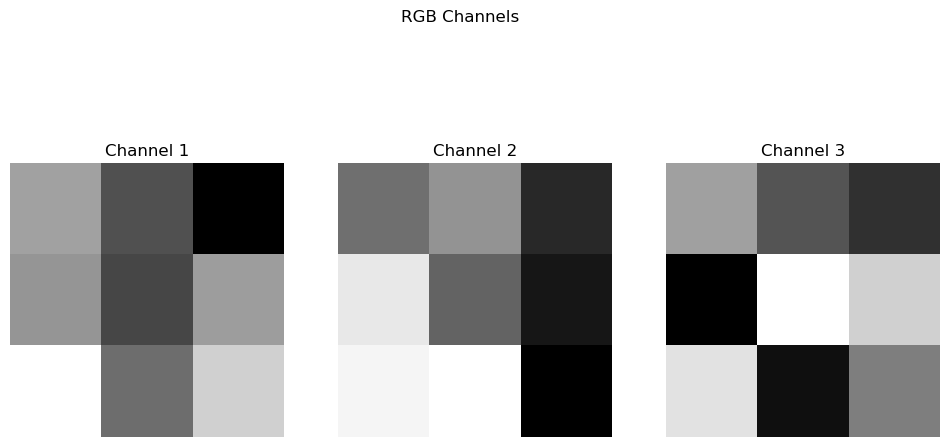

In [38]:
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f"Channel {i+1}")
plt.suptitle("RGB Channels")
plt.show()

# Classify Handwritten Alphabet using Predictions

In [39]:
predictions = model.predict(X_test)

1257/1257 [==============================] - 26s 21ms/step


In [40]:
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report

In [41]:
report = classification_report(y_test, predicted_labels)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1515
         1.0       0.98      0.98      0.98       971
         2.0       0.99      0.99      0.99      2359
         3.0       0.96      0.93      0.95      1078
         4.0       1.00      0.96      0.98      1275
         5.0       0.95      0.99      0.97       231
         6.0       0.94      0.98      0.96       662
         7.0       0.96      0.98      0.97       786
         8.0       0.98      1.00      0.99       228
         9.0       0.98      0.97      0.98       903
        10.0       0.98      0.98      0.98       618
        11.0       0.99      0.98      0.99      1184
        12.0       0.99      1.00      0.99      2004
        13.0       0.99      0.99      0.99      1994
        14.0       0.98      0.99      0.99      5945
        15.0       0.99      0.99      0.99      1986
        16.0       0.98      0.97      0.97       647
        17.0       0.99    

# Visualize Confusion Matrix

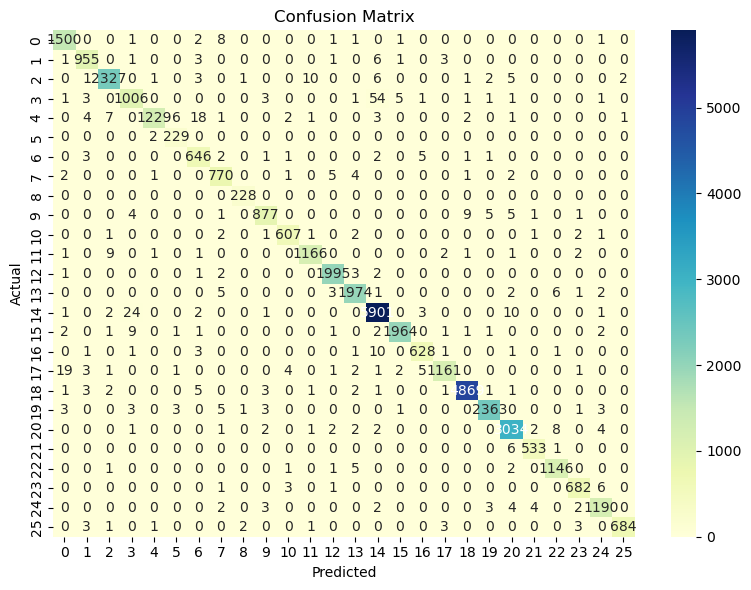

In [45]:
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

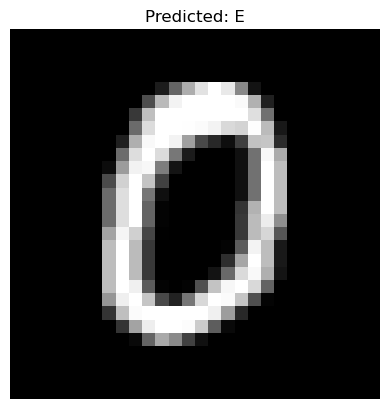

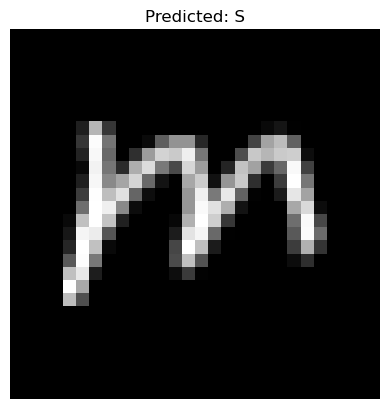

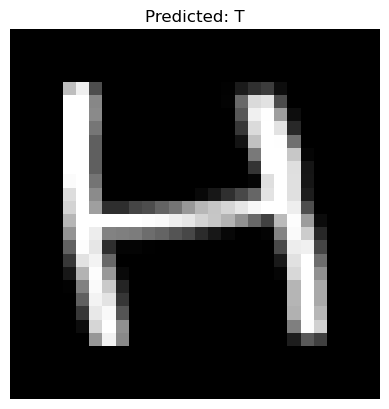

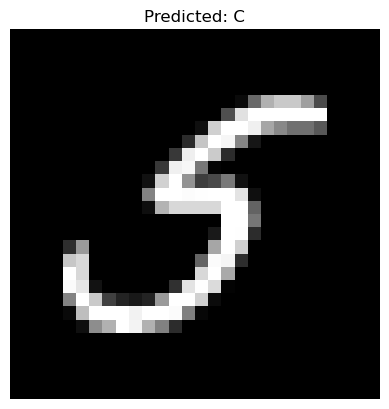

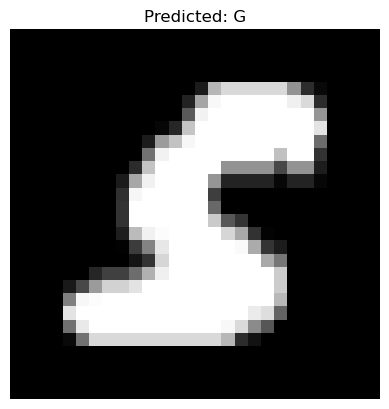

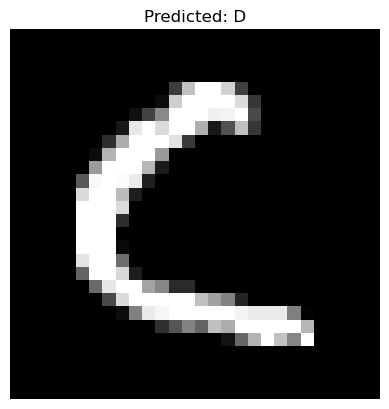

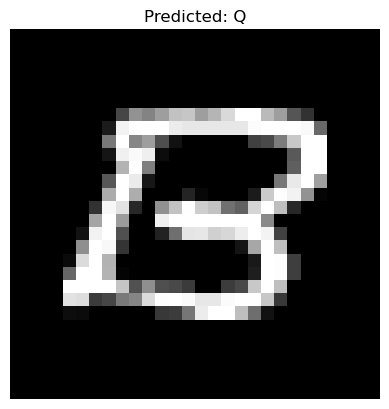

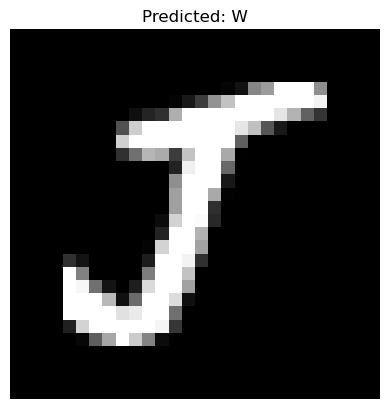

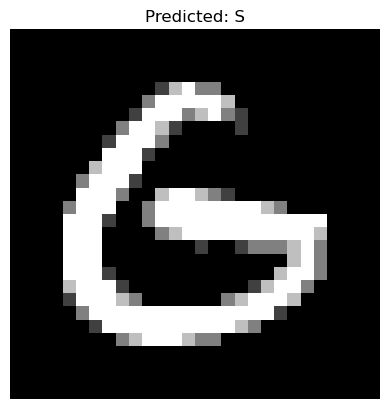

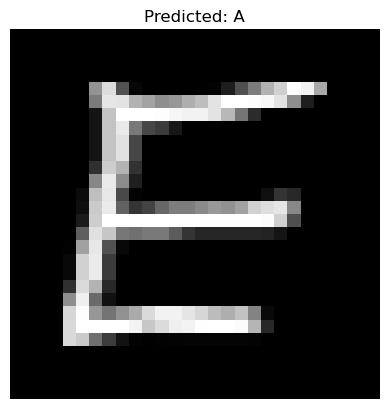

In [48]:
# Define a list of alphabets for reference
alphabets = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# Iterate over the samples_2d and predictions
for i in range(len(samples_2d)):
    # Get the image and prediction for the current sample
    image = samples_2d[i]
    pred = predictions[i]
    
    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    # Get the predicted letter using the maximum probability
    predicted_letter = alphabets[np.argmax(pred)]
    
    # Set the title as the predicted letter
    plt.title(f'Predicted: {predicted_letter}')
    
    # Display the image
    plt.show()